## James Roberts - Music 1A Final Project - Python Notebook Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tcc_ceds_music.csv")

In [3]:
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [4]:
grouped_genre = df.groupby('genre')['release_date'].mean()
grouped_genre

genre
blues      1989.013032
country    1986.058953
hip hop    2012.754425
jazz       1988.526138
pop        1988.305453
reggae     1998.110088
rock       1992.353743
Name: release_date, dtype: float64

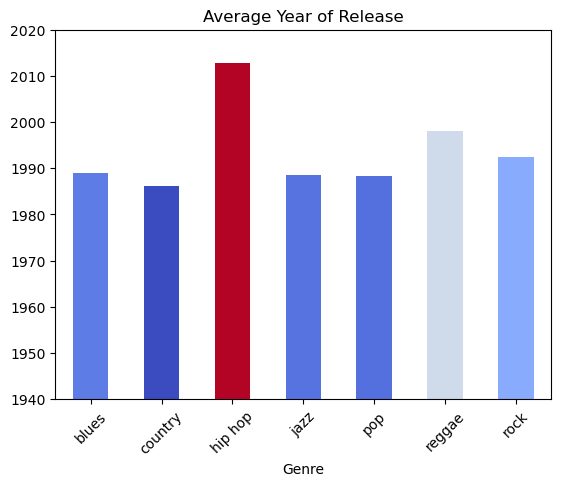

In [93]:
## Graph of Average Release Date by Genre
norm = plt.Normalize(vmin = grouped_genre.min(), vmax = grouped_genre.max())

ax = grouped_genre.plot(kind = 'bar', color = plt.cm.coolwarm(norm(grouped_genre)))
plt.title("Average Year of Release")
plt.ylim(1940, 2020)
plt.xlabel('Genre')
plt.xticks(rotation = 45)
plt.show()

In [5]:
grouped_genre_release = df.groupby(['genre', 'release_date']).size()
grouped_genre_release

genre  release_date
blues  1950              7
       1951              5
       1953              9
       1954              7
       1955             22
                      ... 
rock   2015             94
       2016             82
       2017             86
       2018            103
       2019             76
Length: 431, dtype: int64

In [51]:
# Convert into pivot table
pivot = grouped_genre_release.unstack(level='genre', fill_value=0)

In [52]:
pivot

genre,blues,country,hip hop,jazz,pop,reggae,rock
release_date,,,,,,,
1950,7,11,0,23,10,0,0
1951,5,19,0,26,8,0,0
1952,0,21,0,28,11,0,0
1953,9,3,0,25,11,0,0
1954,7,8,0,80,14,0,0
...,...,...,...,...,...,...,...
2015,81,69,58,83,158,74,94
2016,84,69,21,84,129,64,82
2017,99,71,152,80,105,67,86


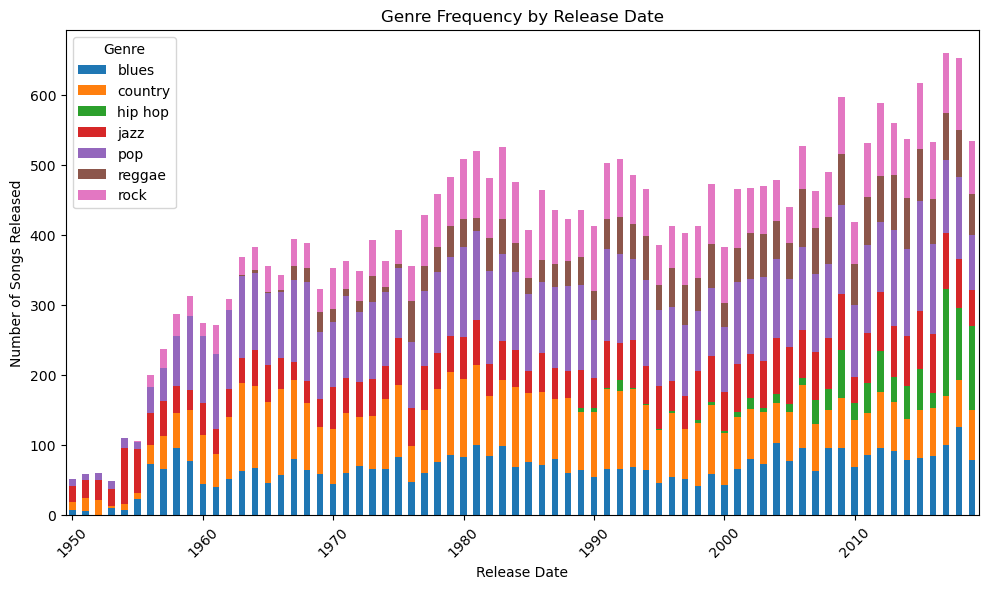

In [64]:
ax = pivot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6),
    color=plt.cm.tab10.colors
)

plt.grid(visible=False)
plt.title('Genre Frequency by Release Date')
plt.xlabel('Release Date')
plt.ylabel('Number of Songs Released')
plt.legend(title='Genre', loc='upper left')
plt.tight_layout()

ticks = list(range(0, len(pivot.index), 10))  # Every 10th entry
plt.xticks(ticks=ticks, labels=pivot.index[ticks], rotation=45)

plt.show()

In [65]:
grouped_noise = df.groupby('release_date')['loudness'].mean()

In [66]:
grouped_noise

release_date
1950    0.566895
1951    0.583148
1952    0.569761
1953    0.566767
1954    0.565076
          ...   
2015    0.739006
2016    0.730245
2017    0.732927
2018    0.736358
2019    0.735271
Name: loudness, Length: 70, dtype: float64

Text(0.5, 0, 'Release Date')

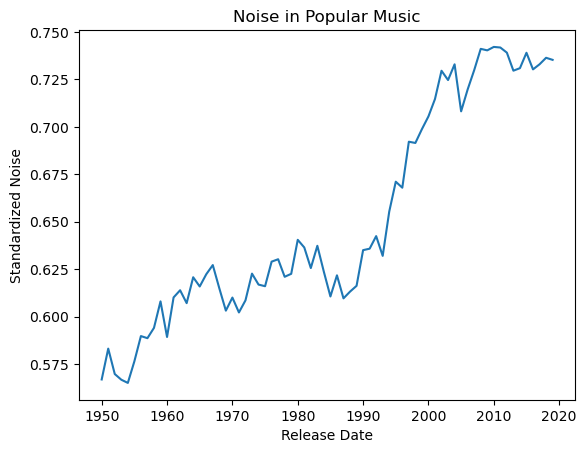

In [73]:
grouped_noise.plot()
plt.title("Noise in Popular Music")
plt.ylabel("Standardized Noise")
plt.xlabel("Release Date")

In [75]:
grouped_noise_genre = df.groupby(['release_date', 'genre'])['loudness'].mean()

In [76]:
grouped_noise_genre

release_date  genre  
1950          blues      0.579109
              country    0.621220
              jazz       0.512548
              pop        0.623585
1951          blues      0.654529
                           ...   
2019          hip hop    0.720356
              jazz       0.677516
              pop        0.751599
              reggae     0.742816
              rock       0.743683
Name: loudness, Length: 431, dtype: float64

In [77]:
pivoted = grouped_noise_genre.unstack(level='genre', fill_value=0)

In [78]:
pivoted

genre,blues,country,hip hop,jazz,pop,reggae,rock
release_date,,,,,,,
1950,0.579109,0.621220,0.000000,0.512548,0.623585,0.000000,0.000000
1951,0.654529,0.581473,0.000000,0.560281,0.616828,0.000000,0.000000
1952,0.000000,0.618983,0.000000,0.515793,0.613167,0.000000,0.000000
1953,0.651280,0.624354,0.000000,0.510168,0.610550,0.000000,0.000000
1954,0.627541,0.642063,0.000000,0.555180,0.546398,0.000000,0.000000
...,...,...,...,...,...,...,...
2015,0.738421,0.752188,0.723242,0.678982,0.751532,0.752811,0.760642
2016,0.729382,0.746425,0.711680,0.683135,0.743415,0.748389,0.735649
2017,0.756879,0.747868,0.732769,0.646669,0.740747,0.757352,0.744963


In [79]:
grouped_gen = df.groupby('genre')['loudness'].mean()

In [80]:
grouped_gen

genre
blues      0.663557
country    0.634207
hip hop    0.726908
jazz       0.607040
pop        0.683559
reggae     0.681872
rock       0.708488
Name: loudness, dtype: float64

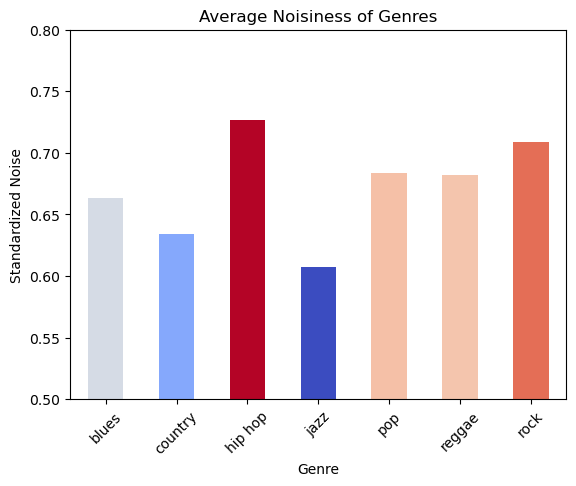

In [92]:
norm1 = plt.Normalize(vmin = grouped_gen.min(), vmax = grouped_gen.max())

ax2 = grouped_gen.plot(kind = 'bar', color = plt.cm.coolwarm(norm1(grouped_gen)))
plt.title("Average Noisiness of Genres")
plt.ylim(0.5, 0.8)
plt.xlabel('Genre')
plt.ylabel('Standardized Noise')
plt.xticks(rotation = 45)
plt.show()